### **`LeNet - Fashion MNIST`**

Fashion MNIST Clothing Classification

<p align="center">
<img src="https://4.bp.blogspot.com/-OQZGt_5WqDo/Wa_Dfa4U15I/AAAAAAAAAUI/veRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs/s400/out.jpg"/>
</p>

The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top <br/>
1: Trouser <br/>
2: Pullover <br/>
3: Dress <br/>
4: Coat <br/>
5: Sandal <br/>
6: Shirt <br/>
7: Sneaker <br/>
8: Bag <br/>
9: Ankle boot



In [2]:
## import tensorflow module

import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [3]:
!pip install h5py 

## **Load the data**

In [4]:
print("[INFO downloading MNIST]")
(trainData , trainLabels) , (testData,testLabels) = tf.keras.datasets.fashion_mnist.load_data()

[INFO downloading MNIST]
4423680/4422102 [==============================] - 0s 0us/step


In [0]:
## Parameter for Fashion mnist data set

image_width = 28
image_height = 28
image_channels = 1     # As it already grayscale image
num_classes = 10       # Output whould be range from 0-9 i.e. 10

In [0]:
## class name

class_name = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

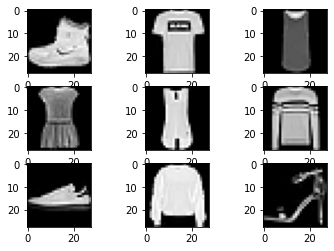

In [7]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainData[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
print("Ankle boot input image :" , trainData[0].shape)
print("Label corresponding to input image :",trainLabels[0])  # 9 represent Ankle boot

Ankle boot input image : (28, 28)
Label corresponding to input image : 9


In [9]:
print(trainData.shape)         # (no. of image , width , height)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
# num_samples x rows x columns x depth (channel)

trainData = trainData.reshape(trainData.shape[0] ,image_height,image_width,image_channels)
testData = testData.reshape(testData.shape[0] ,image_height,image_width,image_channels)

In [11]:
print(trainData.shape)         # (no. of image , width , height, channel)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [0]:
# We normalize the image 
# we scale them between [0.0,1.0]

trainData = trainData.astype("float32") / 255.0 
testData = testData.astype("float32") / 255.0

## **LeNet architecture**

<a href="https://ibb.co/QDrXtJy"><img src="https://i.ibb.co/LNnvH0V/Architecture.jpg" alt="Architecture" border="0"></a>

Tanh activation for all layers. <br/>
Softmax activation for last (output) layer.

In [0]:
'''
      As we are using LeNet architecture we pad the input image of size 28x28 
      into 32x32 size image

'''
trainData = np.pad(trainData, ((0,0) , (2,2) , (2,2) , (0,0)), 'constant')
testData = np.pad(testData , ((0,0) , (2,2) , (2,2) , (0,0)), 'constant')

In [14]:
print(trainData.shape)         # (no. of image , width , height, channel)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)
(60000,)
(10000,)


In [0]:
## Updated parameter for Fashion mnist data set

image_width = 32
image_height = 32
image_channels = 1     # As it already in grayscale image
num_classes = 10       # Output whould be range from 0-9 i.e. 10

##**Import package**


The difference between 'SAME' and 'VALID' padding in tf.nn.max_pool of tensorflow is as follows:

### **`"SAME"`**: 
Here the output size is the same as input size. This requires the filter window to slip outside input map, hence the need to pad.

### **`"VALID"`** :
When you use valid the filter window stays at valid position inside input map, so output size shrinks by filter_size - 1. No padding occurs.


In [0]:
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers

# define the model as a class
class LeNet:

  '''
      In a sequential model, we stack layers sequentially. 
      So, each layer has unique input and output, and those inputs and outputs 
      then also come with a unique input shape and output shape.
  
  '''
  # 2 Convolutional unit (conv,activation,pooling)
  # INPUT => CONV => Relu => AVG-POOL => CONV => Relu => AVG-POOL => FC => Relu => FC => Relu => FC => SOFTMAX
  
  @staticmethod                ## class can instantiated only once 
  def init(numChannels, imgRows, imgCols , numClasses, weightsPath=None):
    
    # if we are using channel first we have update the input size
    if backend.image_data_format() == "channels_first":
      inputShape = (numChannels , imgRows , imgCols)
    else: 
      inputShape = (imgRows , imgCols , numChannels)
    
    # initilize the model
    model = models.Sequential()

    '''
      1. Padding: valid means 0 zero padding
      2. All layers will use the ReLU activation function and the He weight initialization scheme, both best practices. 
      3. An increase in the number of filters used in the convolutional layer can often improve performance,
         as it can provide more opportunity for extracting simple features from the input images.
         This is especially relevant when very small filters are used, such as 3×3 pixels.
    
    '''
    # Define the first set of CONV => ACTIVATION => POOL LAYERS

    model.add(layers.Conv2D(  filters=6,kernel_size=(5,5),strides=(1,1), 
                              padding="valid",activation='relu',kernel_initializer='he_uniform',input_shape=inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    # Define the second set of CONV => ACTIVATION => POOL LAYERS

    model.add(layers.Conv2D(  filters=16,kernel_size=(5,5),strides=(1,1), 
                              padding="valid",activation='relu',kernel_initializer='he_uniform',input_shape=inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    # Flatten the convolution volume to fully connected layers (convert them into single vector)

    model.add(layers.Flatten())

    # Define the first FC layer + Activation 

    model.add(layers.Dense(units=120, activation='relu',kernel_initializer='he_uniform'))

    # Define the second FC layer + Activation 

    model.add(layers.Dense(units=84, activation='relu',kernel_initializer='he_uniform'))

    # lastly , define the softmax classifier

    model.add(layers.Dense(units=numClasses,activation=tf.nn.softmax))

    # if a weights path is supplied (indicating that the model was pre-trained)
    # then add weights

    if weightsPath is not None:
      model.load_weights(weightsPath)
    
    # return the constructed network architecture
    return model

    '''
      NOTE :  Instead adding each layer step by step we can also do 

              model = tf.keras.sequantial([
                          tf.keras.layers.conv2d(.....)
                          tf.keras.layers.averagepooling2d(.....)
                          tf.keras.layers.flatten(.....)
                          tf.keras.layers.dense(.....)
                      ])
              Add layers in the array
    '''

In [19]:
print("[INFO] Compiling model ... ")
model = LeNet.init(numChannels=image_channels,
                    imgRows=image_width,
                    imgCols=image_height,
                    numClasses=num_classes,
                    weightsPath=None                      
                   )

# Compile the model 
# Specify the training configuration (optimizer, loss, metrics)

model.compile(
              optimizer=tf.keras.optimizers.Adam(  
                                                      learning_rate=0.01,   
                                                        beta_1=0.9,
                                                        beta_2=0.999,
                                                        epsilon=1e-07,
                                                        amsgrad=False,
                                                        name="Adam"
                                                    ),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
            )

# Print model summery
model.summary()

[INFO] Compiling model ... 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)             

##**Train Model**

In [21]:
'''
    Define a callback function for training termination criteria
    accuracy cutoff = 0.99  (After 0.99 accuracy is reached ,then model will freez i.e weight updation will never happen)
'''

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    if(logs.net('accuracy')>0.99):
      print("\n Reached 99% accuracy to cancelling training")
      self.model.stop_training = True

# initilize training config 
batch_size = 128
epochs = 100

# Run training
print("[INFO] Training ...")

history = model.fit(x=trainData , y=trainLabels , validation_data=(testData,testLabels),
                    batch_size=batch_size,epochs=epochs,
                    verbose=1)
# save model
'''
  Save Final Model
  A final model is typically fit on all available data, such as the combination of all train and test dataset.

  Note: saving and loading a Keras model requires that the h5py library is installed on your workstation.

  The h5py package is a Pythonic interface to the HDF5 binary data format.
  It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.

'''
model.save('LeNet_model_Fashion_Mnist_Dataset.h5')



[INFO] Training ...
Epoch 1/100
469/469 [==============================] - 33s 70ms/step - loss: 0.3302 - accuracy: 0.8782 - val_loss: 0.3534 - val_accuracy: 0.8714
Epoch 2/100
469/469 [==============================] - 33s 70ms/step - loss: 0.2951 - accuracy: 0.8905 - val_loss: 0.3171 - val_accuracy: 0.8832
Epoch 3/100
469/469 [==============================] - 33s 70ms/step - loss: 0.2762 - accuracy: 0.8972 - val_loss: 0.3118 - val_accuracy: 0.8819
Epoch 4/100
469/469 [==============================] - 33s 71ms/step - loss: 0.2611 - accuracy: 0.9022 - val_loss: 0.3171 - val_accuracy: 0.8883
Epoch 5/100
469/469 [==============================] - 33s 70ms/step - loss: 0.2506 - accuracy: 0.9063 - val_loss: 0.3058 - val_accuracy: 0.8938
Epoch 6/100
469/469 [==============================] - 33s 71ms/step - loss: 0.2399 - accuracy: 0.9103 - val_loss: 0.2858 - val_accuracy: 0.8968
Epoch 7/100
469/469 [==============================] - 33s 71ms/step - loss: 0.2349 - accuracy: 0.9117 - val_l

In [22]:
print('\nhistory dict:', history.history.keys())


history dict: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##**Visualization**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']                         
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))        ## get number of epochs

##**Plot training and validation accuracy per epoch**

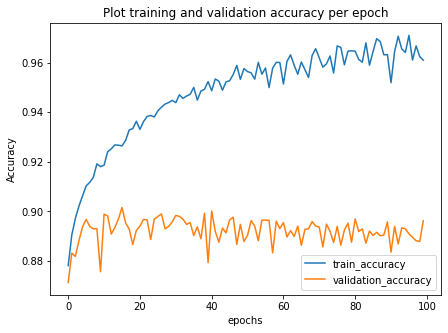

In [24]:
plt.figure(figsize=(7,5))
plt.plot(epochs, acc,label='train_accuracy')
plt.plot(epochs, val_acc,label='validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.title('Plot training and validation accuracy per epoch')
plt.show()


##**Plot training and validation loss per epoch**


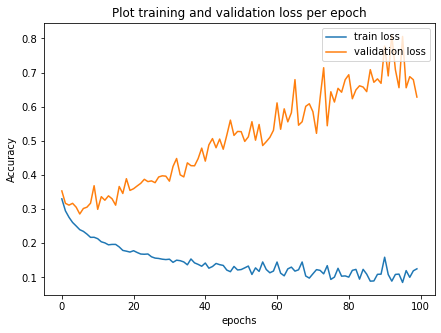

In [26]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss,label='train loss')
plt.plot(epochs, val_loss,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.title('Plot training and validation loss per epoch')
plt.show()

##**Show accuracy on the testing data**

In [27]:
'''
The evaluate_model() function below implements these behaviors,
taking the training dataset as arguments and returning a list of
accuracy scores and training histories that can be later summarized.

'''
print("[INFO] Evaluating ... ")
(loss,accuracy) = model.evaluate(testData,testLabels,batch_size=batch_size,verbose=1)
print("[INFO] accuracy : {:.2f}%".format(accuracy*100))

[INFO] Evaluating ... 
79/79 [==============================] - 2s 28ms/step - loss: 0.6284 - accuracy: 0.8963
[INFO] accuracy : 89.63%


In [0]:
## Save the weight

'''
Here we are storing both model and weights
'''

model.save_weights("weights/LeNet_Fashion_MNIST.temp.hd5",overwrite=True)


##**Evaluate pre-trained model**

In [29]:
'''
from keras.model import load_model doesn't work for me 
Hence i used  -> tf.keras.models.load_model

Check this : https://stackoverflow.com/questions/53183865/unknown-initializer-glorotuniform-when-loading-keras-model
'''

print("[INFO] Compiling model ... ")
model =  tf.keras.models.load_model('LeNet_model_Fashion_Mnist_Dataset.h5')

[INFO] Compiling model ... 


In [30]:
'''
As we are using pre-trained model we don't have to re-train the model
we are not writing the whole architecture again  
'''

print("[INFO] Evaluating ... ")
(loss,accuracy) = model.evaluate(testData,testLabels,batch_size=batch_size,verbose=1)
print("[INFO] accuracy : {:.2f}%".format(accuracy*100))

[INFO] Evaluating ... 
79/79 [==============================] - 2s 28ms/step - loss: 0.6284 - accuracy: 0.8963
[INFO] accuracy : 89.63%


##**Model predictions**

In [0]:
# import package -> OpenCV
import cv2               # cv : computer vision libray

In [33]:
# set up matplotlib fig and size it to fit 3 rows and 4 col

nrows = 3
ncols = 4
'''
matplotlib.pyplot.gcf() is primarily used to get the current figure.
If no current figure is available then one is created with the help of the figure() function

'''
fig = plt.gcf()
fig.set_size_inches(ncols*6 , nrows*6)

<Figure size 1728x1296 with 0 Axes>

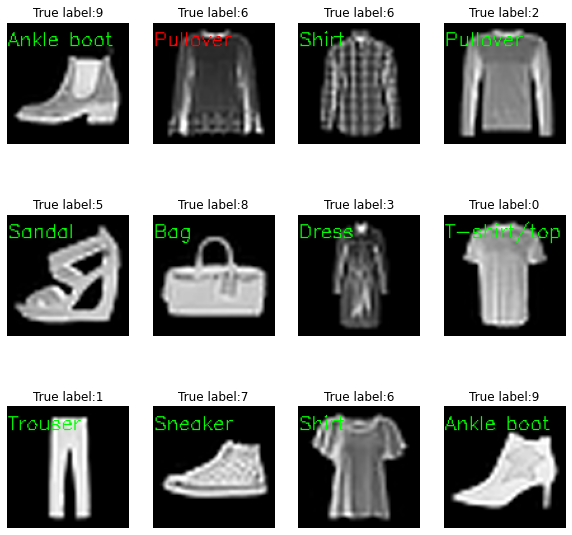

In [36]:
# Randomly select a few testing image
plt.figure(figsize=(10,10))
num_prediction = 12

'''
Generate a uniform random sample from np.arange(5) of size 3:

>>> np.random.choice(5, 3)
array([0, 3, 4])
>>> #This is equivalent to np.random.randint(0,5,3)

'''
# index of selected random image from test dataset
test_indices = np.random.choice(np.arange(0, len(testLabels)),size=(num_prediction,))     

# Get the testing image using list comprehension
test_images = np.stack(([ testData[i] for i in test_indices ]))

# Get the testing image labels using list comprehension
test_labels = np.stack(([ testLabels[i] for i in test_indices ])) 

# Compute_prediction
predictions = model.predict(test_images)

for i in range(num_prediction):

  '''
  As output would be in the form of probability as we are using softmax function
  at output layer , so we are choosing the class which have highest probability
  '''
  prediction = np.argmax(predictions[i])

  # rescale the test image 
  # As it was normailize between 0 to 1 
  image = (test_images[i]*255).astype("uint8") 

  # resize the image from a 28x28 images into 96x96 so that can see the image clearly
  image = cv2.resize(image, (96,96), interpolation=cv2.INTER_CUBIC)

  # convert grayscale into rgb color , 3 represent -: 3 channels
  image = cv2.merge([image]*3)

  # if prediction == ground truth label then mark with green else with red
  if prediction == test_labels[i]:
    rgb_color = (0,255,0)       ## true prediction
  else:
    rgb_color = (255,0,0)       ## False prediction

  # put text on the image
  cv2.putText(image, str(class_name[prediction]),(0,18), cv2.FONT_HERSHEY_SIMPLEX,0.50,rgb_color,1)

  # set up subplot ; subplot indices starts from 1
  sp = plt.subplot(nrows,ncols,i+1,title="True label:%s"% test_labels[i])
  sp.axis('Off')      # Don't show axis
  plt.imshow(image)

plt.show()  

### **Test on sample image**

#### **Test Image : Pullover** <br/>
  <p align="center"/>
  <img src="https://i.ibb.co/BB9f9jr/sample-image.png" alt="sample-image" border="0" width="30%">
  </p>

Reference : [https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/)

In [0]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 32, 32, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = tf.keras.models.load_model('LeNet_model_Fashion_Mnist_Dataset.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])



In [46]:
'''
 Here 2 means Pullover , Hence Our model succesfully predicted the class or label
'''
run_example()

2


Reference :

1.  [Shala2020 Website](shala2020.github.io/)
2.  [DLV-1-CNNs for Image Classification](https://www.youtube.com/watch?v=ucV1TbhoueM&t=2428s)
3.[machinelearningmastery- save-load-keras-deep-learning-models](https://machinelearningmastery.com/save-load-keras-deep-learning-models/#:~:text=Save%20Your%20Neural%20Network%20Model%20to%20JSON&text=This%20can%20be%20saved%20to,the%20symmetrical%20load_weights()%20function.)